In [20]:
from lib.error_mit_sim import *
import warnings
from qiskit import transpile
from qiskit.providers.fake_provider import *
# List of basis gates


def circuit_transpiled(n, backend):
    """
    Transpile a quantum circuit for a specific backend.

    Parameters:
    - n (int): The number of qubits in the circuit.
    - backend (Backend): The backend for which to transpile the circuit.

    Returns:
    - printed (None): Printed information about basis gates and circuit depth.
    - a_tran (Matplotlib object): The drawing of the transpiled circuit.
    """
    
    
    a = TwoLocal(n, rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=3, insert_barriers=True)
    
    # Transpile the circuit into the basis gates
    config = backend.configuration()
    basis_gates = config.basis_gates
    transpiled_circ = transpile(a, backend=backend)
    
    printed = print('Basis Gates:', basis_gates, '\n', 'Original depth:', a.depth(), 'Decomposed Depth:', transpiled_circ.depth())
    a_tran = transpiled_circ.draw(output='mpl')
    
    return a_tran, printed
    
    


Basis Gates: ['id', 'u1', 'u2', 'u3', 'cx'] 
 Original depth: 1 Decomposed Depth: 13


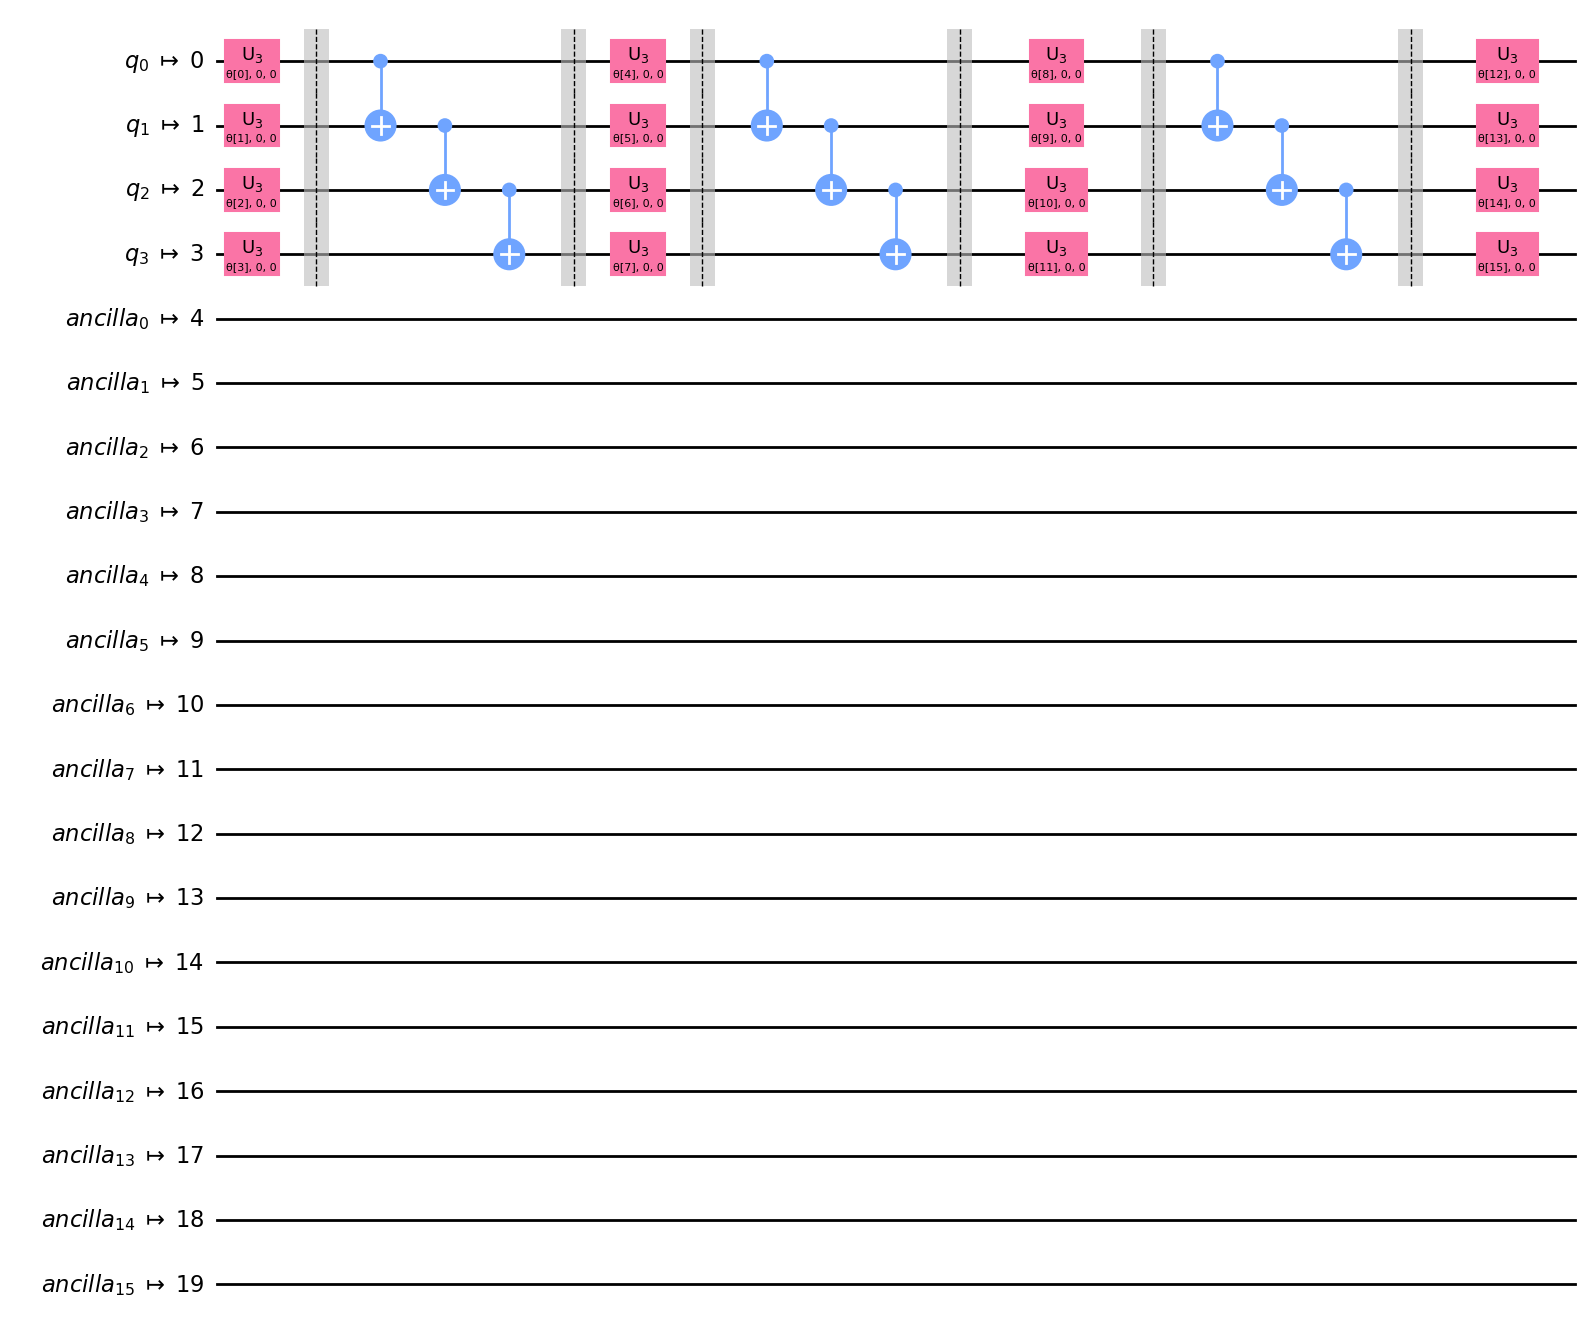

In [21]:
# Transpile the circuit into the basis gates
n = 4
b1= FakeAlmaden()
c1, p1 = circuit_transpiled(n,b1)
c1

Basis Gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset'] 
 Original depth: 1 Decomposed Depth: 25


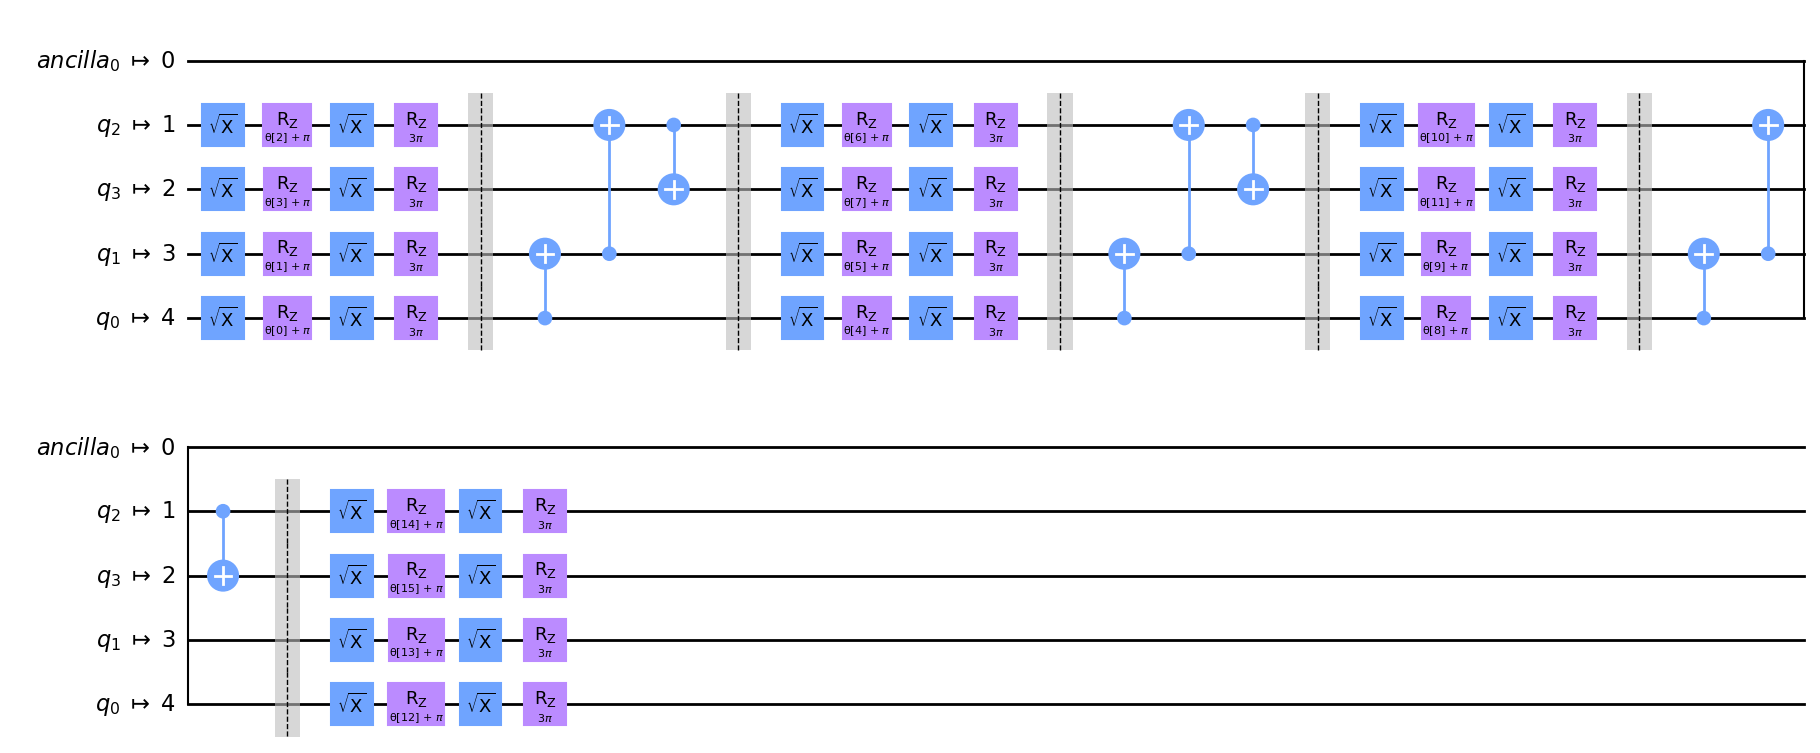

In [22]:
# Transpile the circuit into the basis gates
n = 4
b2= FakeBelem()
c2, p2 = circuit_transpiled(n,b2)
c2